In [1]:
from os import listdir
from os.path import isfile, join
import string

In [2]:
my_path = '20_newsgroups'

#creating a list of folder names to make valid pathnames later
folders = [f for f in listdir(my_path)]

In [3]:
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
#Storing the filenames and their paths.

files = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    files.append([f for f in listdir(folder_path)])

In [5]:
#creating a list of pathnames of all the documents
#this would serve to split our dataset into train & test later without any bias

pathname_list = []
for fo in range(len(folders)):
    for fi in files[fo]:
        pathname_list.append(join(my_path, join(folders[fo], fi)))

In [6]:
#making an array containing the classes each of the documents belong to

Y = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    num_of_files= len(listdir(folder_path))
    for i in range(num_of_files):
        Y.append(folder_name)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Splitting the dataset
doc_train, doc_test, Y_train, Y_test = train_test_split(pathname_list, Y, random_state=0, test_size=0.25)

In [9]:
stopwords = ["i","me","my","myself","we","our","ours","ourselves","you", "your", "yours" , "yourself", "yourselves", "he"         "him"        "his"        "himself"    "she"       
  "her"   ,     "hers" ,      "herself" ,   "it" ,        "its"   ,     "itself"     "they"      , "them","their",     
  "theirs" ,    "themselves", "what"    ,   "which",      "who"    ,    "whom"       "this"     ,  "that" ,"these",     
 "those"    ,  "am"  ,       "is"   ,      "are"  ,      "was"    ,    "were"       "be"        , "been"  , "being",     
  "have"     ,  "has"  ,      "had"  ,      "having",     "do"     ,    "does"       "did"      ,  "doing","would",     
  "should"   ,  "could"  ,    "ought" ,     "i'm" ,       "you're" ,    "he's"       "she's"    ,  "it's","we're",     
  "they're"  ,  "i've"    ,   "you've" ,    "we've"    ,  "they've" ,   "i'd"        "you'd"    ,  "he'd" ,"she'd",     
 "we'd"      , "they'd"   ,  "i'll"    ,   "you'll"   ,  "he'll"    ,  "she'll"     "we'll"     , "they'll","isn't",     
  "aren't"   ,  "wasn't"  ,   "weren't" ,   "hasn't"  ,   "haven't" ,   "hadn't"     "doesn't"   , "don't" ,"didn't",    
  "won't"    ,  "wouldn't",   "shan't"  ,   "shouldn't" , "can't"   ,   "cannot"     "couldn't"  , "mustn't","let's",     
 "that's"    , "who's"   ,   "what's"   ,  "here's"  ,   "there's"  ,  "when's"     "where's"  ,  "why's","how's" ,    
 "a"         , "an"      ,   "the"      ,  "and"    ,    "but"     ,   "if"         "or"     ,    "because" ,"as",        
 "until"     , "while"   ,   "of"       ,  "at"    ,     "by"      ,   "for"        "with"   ,    "about","against",   
"between"    ,"into"     ,  "through"   , "during",     "before"   ,  "after"      "above"    ,  "below","to" ,       
"from"       ,"up"      ,   "down"      , "in"   ,      "out"     ,   "on"         "off"    ,    "over" , "under",     
"again"      ,"further",    "then"       ,"once" ,      "here"   ,    "there"      "when"   ,    "where",  "why" ,      
"how"        ,"all"   ,     "any"        ,"both",       "each"    ,   "few"        "more"  ,     "most" , "other",     
"some"       ,"such" ,      "no"         ,"nor",        "not"     ,   "only"       "own"   ,     "same" ,  "so"   ,     
 "than"       ,"too",        "very"       ,"will", "for","this" ,"with", "they", "can", "there", "one","two","three","when", 
             "just", "more", "were", "know", "only", "get", "think", "his", "also", "does", "use", "time", "now","she","her","else","above"]

In [10]:
#function to preprocess the words list to remove punctuations
import nltk 
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
def cleancorpus(words):
    
    #first we will try to filter out some  unnecessary data like tabs
    table = str.maketrans('', '', '\t')
    words = [word.translate(table) for word in words]
    
    punctuations = (string.punctuation).replace("'", "") 
    
    trans_table = str.maketrans('', '', punctuations)
    stripped_words = [word.translate(trans_table) for word in words]
    
    #remove whitespaces
    words = [str for str in stripped_words if str]
    
    #map quotes to words who are single quoted.
    p_words = []
    for word in words:
        if (word[0] and word[len(word)-1] == "'"):
            word = word[1:len(word)-1]
        elif(word[0] == "'"):
            word = word[1:len(word)]
        else:
            word = word
        p_words.append(word)
    
    words = p_words.copy()
        
    #remove just-numeric strings as they do not have any significant meaning in text classification
    words = [word for word in words if not word.isdigit()]
    
    #remove single character strings
    words = [word for word in words if not len(word) == 1]
    
    #remove words with 2 char length
    words = [word for word in words if len(word) > 2]
    
    #remove empty strings
    words = [str for str in words if str]
    
    #convert to lower case
    words = [word.lower() for word in words]
    
    words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    
    return words

In [11]:
#function to remove stopwords

def remove_stopwords(words):
    words = [word for word in words if not word in stopwords]
    return words

In [12]:
#function to convert a sentence into list of words

def tokenize_sentence(line):
    words = line[0:len(line)-1].strip().split(" ")
    words = cleancorpus(words)
    words = remove_stopwords(words)
    
    return words

In [13]:
#function to remove metadata

def remove_metadata(lines):
    for i in range(len(lines)):
        if(lines[i] == '\n'):
            start = i+1
            break
    new_lines = lines[start:]
    return new_lines

In [14]:
#function to convert a document into list of words

def tokenize(path):
    #load document as a list of lines
    f = open(path, 'r', encoding='cp1252')
    text_lines = f.readlines()
    
    #removing the meta-data at the top of each document
    text_lines = remove_metadata(text_lines)
    
    #initiazing an array to hold all the words in a document
    doc_words = []
    
    #traverse over all the lines and tokenize each one with the help of helper function: tokenize_sentence
    for line in text_lines:
        doc_words.append(tokenize_sentence(line))

    return doc_words

In [15]:
#a simple helper function to convert a 2D array to 1D, without using numpy

def flatten(list):
    new_list = []
    for i in list:
        for j in i:
            new_list.append(j)
    return new_list

In [16]:
len(folders)


20

In [17]:
list_of_words = []

for document in doc_train:
        list_of_words.append(flatten(tokenize(document)))

In [18]:
len(list_of_words)

14997

In [19]:
len(flatten(list_of_words))

1916428

In [20]:
import numpy as np
np_list_of_words = np.asarray(flatten(list_of_words))

In [21]:
#finding the number of unique words that we have extracted from the documents

words, counts = np.unique(np_list_of_words, return_counts=True)
len(words)

137245

In [22]:
#sorting the unique words according to their frequency

freq, wrds = (list(i) for i in zip(*(sorted(zip(counts, words), reverse=True))))

In [23]:
f_o_w = []
n_o_w = []
for f in sorted(np.unique(freq), reverse=True):
    f_o_w.append(f)
    n_o_w.append(freq.count(f))

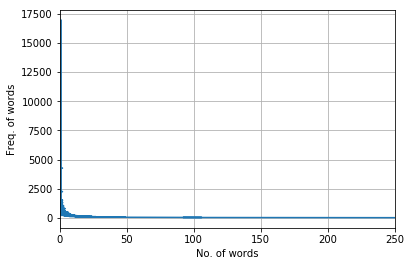

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
y = f_o_w
x = n_o_w
plt.xlim(0,250)
plt.xlabel("No. of words")
plt.ylabel("Freq. of words")
plt.plot(x, y)
plt.grid()
plt.show()

In [25]:
#deciding the no. of words to use as feature

n = 5000
features = wrds[0:n]
print(features)

['wa', 'writes', 'article', 'ha', 'people', 'like', 'doe', 'say', 'make', 'right', 'good', 'thing', 'way', 'new', 'system', 'even', 'year', 'see', 'may', 'well', 'problem', 'work', 'want', 'many', 'much', 'god', 'first', 'need', 'file', 'did', 'anyone', 'said', 'used', 'after', "ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax", 'window', 'question', 'take', 'really', 'point', 'believe', 'something', 'come', 'mean', 'still', 'since', 'please', 'number', 'day', 'program', 'him', 'state', 'back', 'government', 'find', 'look', 'game', 'going', 'email', 'might', 'law', 'part', 'information', 'using', 'better', 'case', 'fact', 'off', 'last', 'help', 'own', 'never', 'thanks', 'drive', 'give', 'must', 'read', 'sure', 'without', "doesn't", 'group', 'someone', 'another', 'car', 'made', 'lot', 'got', 'run', 'university', 'etc', 'line', 'world', 'word', 'reason', 'few', 'set', 'key', 'available', 'tell', 'life', 'however', 'data', 'anything', 'power', 'christian', 'little', 'opinion', 'book', 'around

In [26]:
#creating a dictionary that contains each document's vocabulary and ocurence of each word of the vocabulary 

dictionary = {}
doc_num = 1
for doc_words in list_of_words:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary[doc_num] = {}
    for i in range(len(w)):
        dictionary[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1

In [27]:
#now we make a 2D array having the frequency of each word of our feature set in each individual documents

X_train = []
for k in dictionary.keys():
    row = []
    for f in features:
        if(f in dictionary[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
            row.append(dictionary[k][f]) 
        else:
            #if not present, the no. of occurences is zero
            row.append(0)
    X_train.append(row)

In [28]:
#we convert the X and Y into np array for concatenation and conversion into dataframe

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [29]:
len(X_train)

14997

In [30]:
len(Y_train)

14997

In [31]:
list_of_words_test = []

for document in doc_test:
        list_of_words_test.append(flatten(tokenize(document)))

In [32]:
dictionary_test = {}
doc_num = 1
for doc_words in list_of_words_test:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary_test[doc_num] = {}
    for i in range(len(w)):
        dictionary_test[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1

In [33]:


X_test = []
for k in dictionary_test.keys():
    row = []
    for f in features:
        if(f in dictionary_test[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
            row.append(dictionary_test[k][f]) 
        else:
            #if not present, the no. of occurences is zero
            row.append(0)
    X_test.append(row)

In [34]:
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [35]:
len(X_test)

5000

In [36]:
len(Y_test)

5000

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha =1)
clf.fit(X_train, Y_train)

In [57]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha =0.1 )
clf.fit(X_train,Y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [58]:
Y_predict = clf.predict(X_test)

In [59]:
clf.score(X_test, Y_test)

0.7788

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, Y_predict))

                          precision    recall  f1-score   support

             alt.atheism       0.56      0.73      0.63       233
           comp.graphics       0.55      0.64      0.59       253
 comp.os.ms-windows.misc       0.77      0.45      0.57       249
comp.sys.ibm.pc.hardware       0.56      0.73      0.63       240
   comp.sys.mac.hardware       0.85      0.62      0.72       236
          comp.windows.x       0.56      0.79      0.65       240
            misc.forsale       0.85      0.58      0.69       261
               rec.autos       0.79      0.78      0.78       269
         rec.motorcycles       0.95      0.71      0.81       284
      rec.sport.baseball       0.91      0.83      0.87       248
        rec.sport.hockey       0.85      0.95      0.89       231
               sci.crypt       0.76      0.83      0.80       233
         sci.electronics       0.79      0.57      0.66       244
                 sci.med       0.93      0.80      0.86       256
         

In [41]:
#Train Scores
Y_predict_tr = clf.predict(X_train)

In [42]:
clf.score(X_train, Y_train)

0.8419683936787358

In [43]:
print(classification_report(Y_train, Y_predict_tr))

                          precision    recall  f1-score   support

             alt.atheism       0.71      0.85      0.77       767
           comp.graphics       0.70      0.78      0.74       747
 comp.os.ms-windows.misc       0.83      0.78      0.81       751
comp.sys.ibm.pc.hardware       0.77      0.83      0.80       760
   comp.sys.mac.hardware       0.79      0.89      0.84       764
          comp.windows.x       0.89      0.81      0.85       760
            misc.forsale       0.87      0.85      0.86       739
               rec.autos       0.90      0.90      0.90       731
         rec.motorcycles       0.88      0.95      0.91       716
      rec.sport.baseball       0.94      0.94      0.94       752
        rec.sport.hockey       0.91      0.96      0.93       769
               sci.crypt       0.92      0.91      0.92       767
         sci.electronics       0.87      0.79      0.83       756
                 sci.med       0.94      0.88      0.91       744
         